In [1]:
import pandas as pd
import csv
import os

In [2]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_3min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_3min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [3]:

base_folder = "csv/30s1s/"

dataset = pd.DataFrame()

for path, subdirs, files in os.walk(base_folder):
    for name in files:
        #print(os.path.join(str(path), str(name)))
        data = pd.read_csv(os.path.join(str(path), str(name)))
        dataset = pd.concat([dataset, data])
dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
len(features)

129

In [4]:
dataset['label'].value_counts()

youtube    283
netflix    216
twitch     119
Name: label, dtype: int64

In [5]:
dataset['label'] = pd.factorize(dataset['label'])[0]

In [6]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [7]:
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']
dataset_normalized = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())
dataset_normalized['label'] = dataset['label']

In [8]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset_normalized)
dataset_pca = pd.DataFrame(data = main_components)
dataset_pca['label'] = dataset['label']


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset_pca, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [10]:
dataset_pca.corr()['label'].sort_values(ascending=False)

label    1.000000
1        0.725496
5        0.441163
0        0.430592
3        0.155326
8        0.131088
7        0.060703
6        0.028208
4        0.007298
2       -0.110521
9       -0.110964
Name: label, dtype: float64

In [11]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [12]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
y_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")
y_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")
y_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")
y_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_predict, cross_val_score\nimport matplotlib.pyplot as plt\n\nrandom_forest = RandomForestClassifier(random_state=42)\ny_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")\ny_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")\ny_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")\ny_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")\n'

In [13]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [14]:
'''
y_scores_forest_y = y_probas_forest_y[:, 1]
y_scores_forest_n = y_probas_forest_n[:, 1]
y_scores_forest_t = y_probas_forest_t[:, 1]

fpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)
fpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)
fpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


plot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")
plot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")
plot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")
#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

plt.legend(loc="lower right")
plt.show()
#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
#accuracy = sum(cvs)/len(cvs)
#print("Accuracy: " + str(accuracy))
'''

'\ny_scores_forest_y = y_probas_forest_y[:, 1]\ny_scores_forest_n = y_probas_forest_n[:, 1]\ny_scores_forest_t = y_probas_forest_t[:, 1]\n\nfpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)\nfpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)\nfpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)\n#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)\n\n\nplot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")\nplot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")\nplot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")\n#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")\n\nplt.legend(loc="lower right")\nplt.show()\n#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring=\'accuracy\')\n#accuracy = sum(cvs)/len(cvs)\n#print("Accuracy: " + str(accuracy))\n'

In [15]:
'''
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
conf_mx
'''

'\nrandom_forest.fit(x_train, y_train)\npredictions = random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nconf_mx\n'

In [16]:
#grid_search_acc = GridSearchCV(random_forest, params, cv=10, scoring='accuracy')
#grid_search_acc.fit(x_train, y_train)

In [17]:
#best = grid_search.best_estimator_

In [18]:
#best2 = grid_search_acc.best_estimator_

In [19]:
#sorted(zip(grid_search.best_estimator_.feature_importances_, basic_stats), reverse=True)

In [20]:
'''
# Final evaluation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(x_train, y_train)
print("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))
'''

'\n# Final evaluation\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9, max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)\nrf.fit(x_train, y_train)\nprint("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))\n'

In [21]:
'''
crossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")
crossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))
'''

'\ncrossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")\ncrossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")\nprint("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))\n'

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):

    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")

    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")

    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [23]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    
    pca = PCA(n_components=2)
    pca.fit_transform(dataset)
    
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")

    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


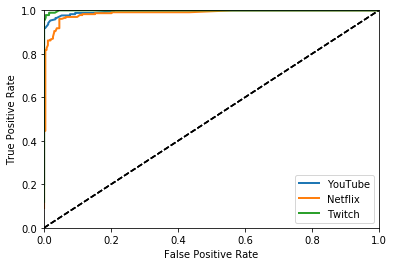

YouTube: 
	CrossValScore: 0.9655510204081633
	RocAucScore:  0.9955280357757138
Netflix: 
	CrossValScore: 0.9573845538215288
	RocAucScore:  0.9867907757641597
Twitch: 
	CrossValScore: 0.9879951980792316
	RocAucScore:  0.9993240320138439
Multiclass: 
	CrossValScore: 0.9515777080062794
[[43  2  0]
 [ 0 52  0]
 [ 0  0 27]]

Accuracy train set: 1.0
Accuracy test set: 0.9838709677419355
----------SVM-----------


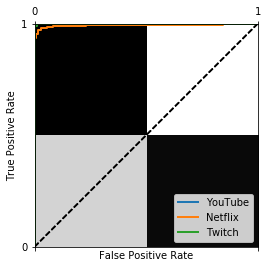

YouTube: 
	CrossValScore: 1.0
	RocAucScore:  1.0
Netflix: 
	CrossValScore: 0.9736310524209685
	RocAucScore:  0.9926917189274604
Twitch: 
	CrossValScore: 0.9899559823929571
	RocAucScore:  0.9997025740860913
Multiclass: 
	CrossValScore: 0.9899544740973312
[[45  0  0]
 [ 0 52  0]
 [ 0  0 27]]

Accuracy train set: 0.9979757085020243
Accuracy test set: 1.0


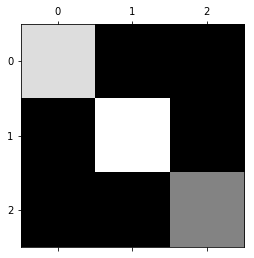

In [24]:
from sklearn.svm import SVC

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
do_test_forest(rf)
print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)